In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Correlation between count of survived people and sex**

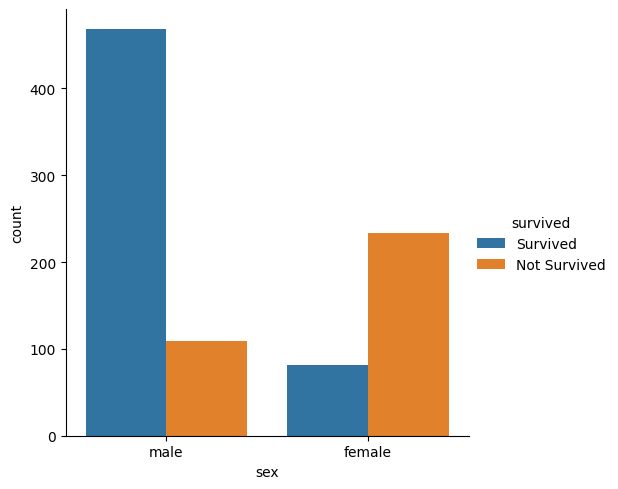

In [12]:
df['survived'] = df['survived'].replace({0: 'Survived', 1: 'Not Survived'})
sns.catplot(x = 'sex', hue = 'survived', kind = 'count', data = df)

**Correlation between Passenger Class and Count of survived people**

In [18]:
group = df.groupby(['class','survived'],observed=False)
pclass_survived = group.size().unstack()

In [19]:
pclass_survived

survived,Not Survived,Survived
class,,
First,136,80
Second,87,97
Third,119,372


<Axes: xlabel='survived', ylabel='class'>

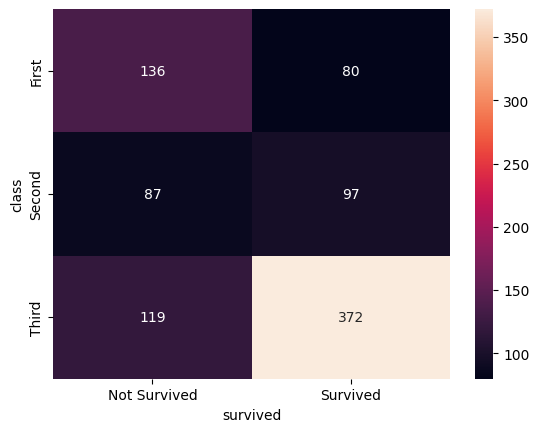

In [20]:
sns.heatmap(pclass_survived, annot = True, fmt = 'd')

**Correlation between Age, Sex and distribution of Survived**

<Axes: xlabel='sex', ylabel='age'>

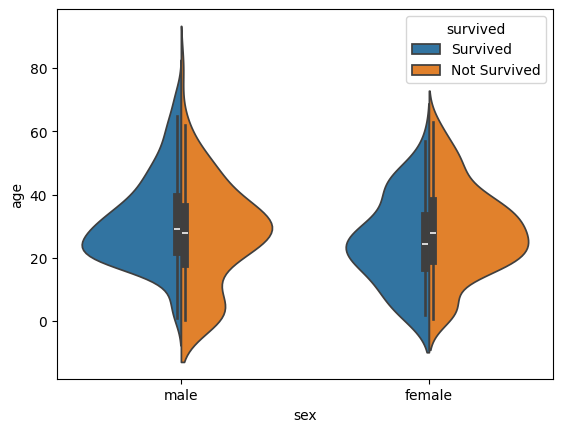

In [23]:
sns.violinplot(x ="sex", y ="age", hue ="survived", data = df, split = True)

**Correlation between Fare and Survival Probability**

<Axes: xlabel='Fare_Range', ylabel='survived'>

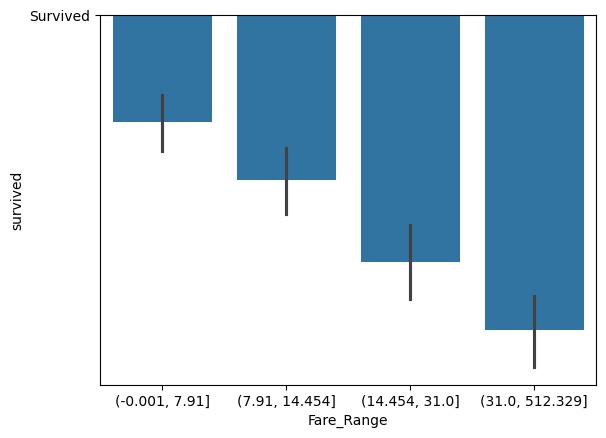

In [24]:
df['Fare_Range'] = pd.qcut(df['fare'], 4)
sns.barplot(x ='Fare_Range', y ='survived', data = df)

**Correlation b/w City Embarked on, Passenger Class and Count of Survived**

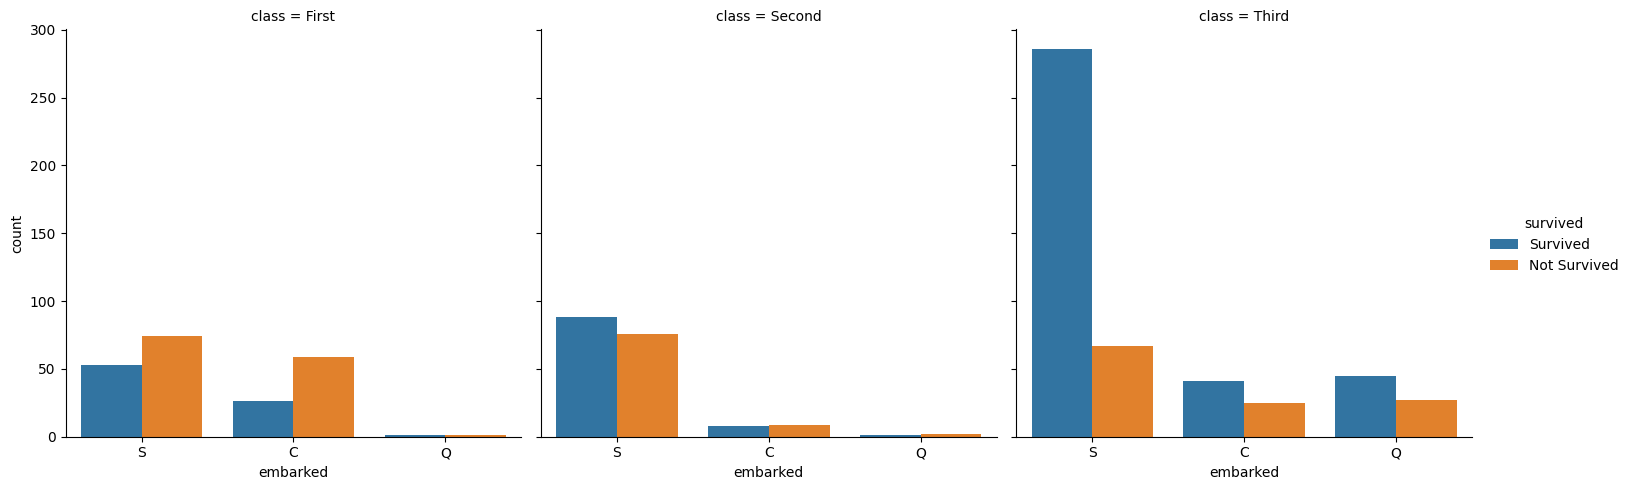

In [25]:
sns.catplot(x ='embarked', hue ='survived', kind ='count', col ='class', data = df)

In [26]:
df.dtypes

survived         object
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
Fare_Range     category
dtype: object

In [27]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
df.fare.value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

<Axes: xlabel='fare', ylabel='Count'>

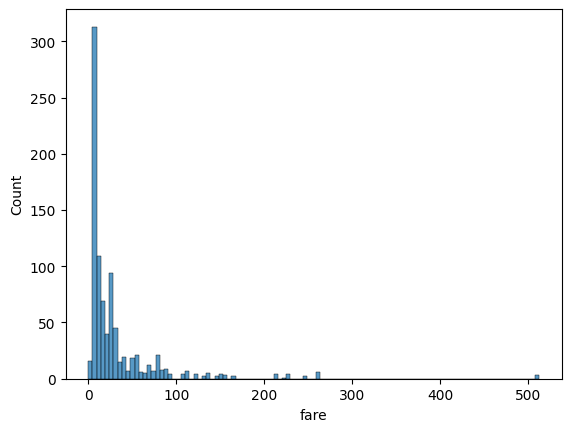

In [29]:
sns.histplot(data = df, x = 'fare')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='survived'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


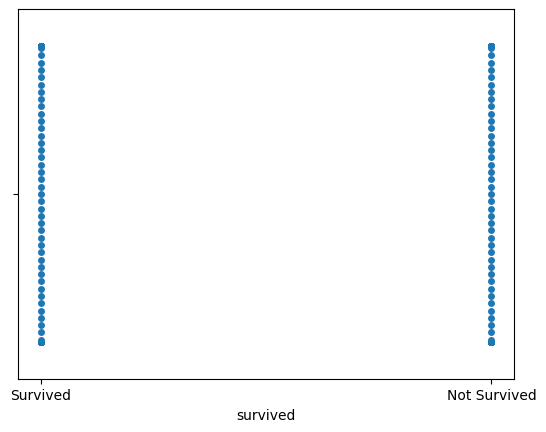

In [37]:
sns.swarmplot(data = df, x = df['survived'])

In [38]:
df.dtypes

survived         object
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
Fare_Range     category
dtype: object

<Axes: xlabel='sex', ylabel='age'>

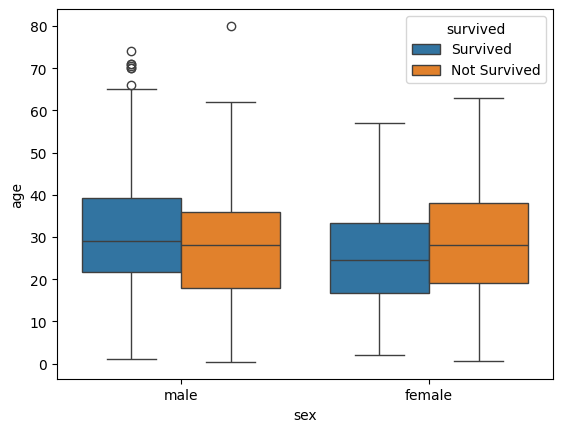

In [39]:
sns.boxplot(x = df['sex'], y = df['age'], hue = df['survived'])

<Axes: >

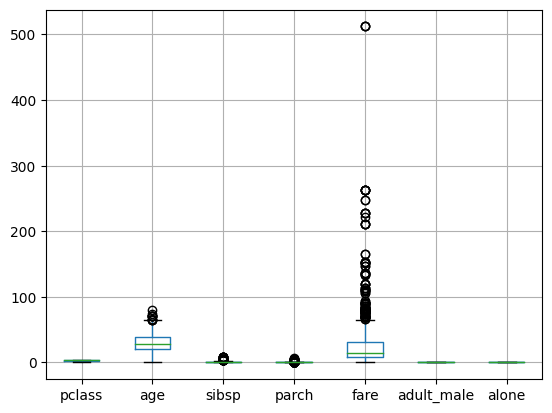

In [40]:
df.boxplot()

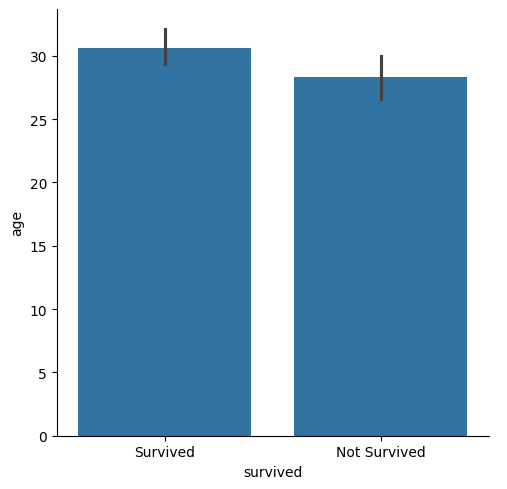

In [41]:
sns.catplot(data = df, kind = 'bar', x = 'survived', y = 'age')

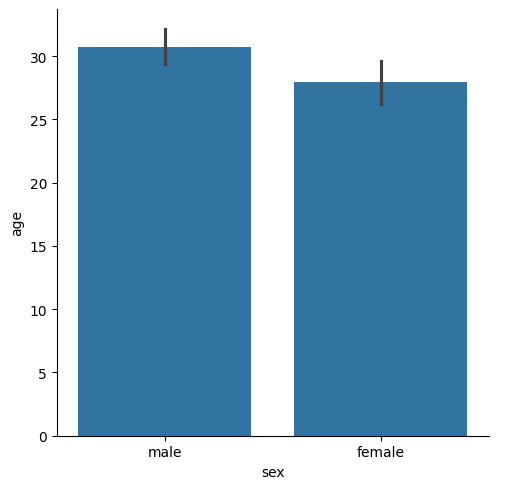

In [42]:
sns.catplot(data = df, kind = 'bar', x = 'sex', y = 'age')

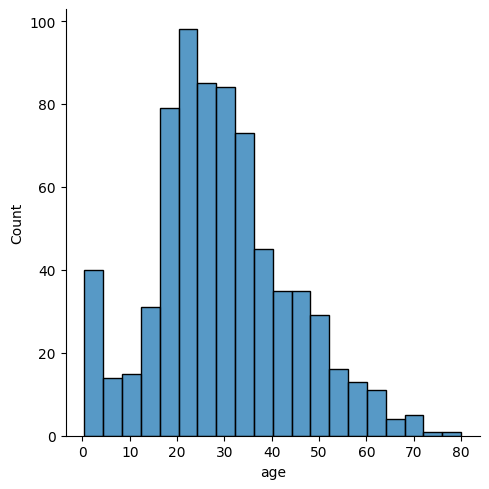

In [43]:
sns.displot(data = df, x = 'age')

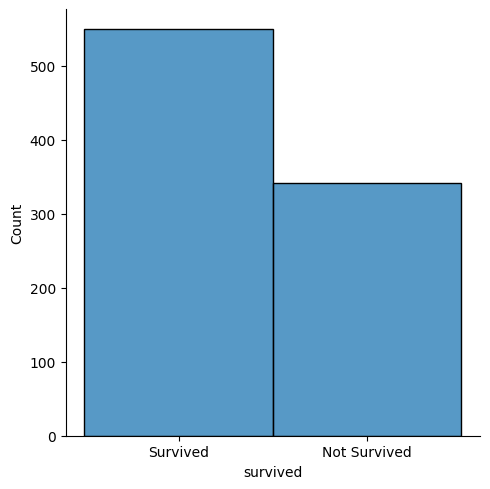

In [44]:
sns.displot(data = df, x = 'survived')